In [17]:
import pandas as pd
import matplotlib.pyplot as plt

out_file ='full_with_headlines.csv'
head_split = '    '
news_df = pd.read_csv(out_file)
#news_df = news_df[(news_df['headlines'].notna()) & (news_df['headlines'] != "")].reset_index()
news_df['winner'] = news_df.groupby(['year','state','district','totalvotes'], sort=False)['candidatevotes'].transform(max)
news_df['winner'] = news_df['winner'] == news_df['candidatevotes']

In [18]:
news_df['totalvotes'].sum()

4185509098

In [19]:
news_df['winner'].sum() / len(news_df)

0.5049719761345145

In [30]:
r = news_df[news_df['party'] == "REPUBLICAN"]
d = news_df[news_df['party'] == "DEMOCRAT"]
i = news_df[(news_df['party'] != "REPUBLICAN")& (news_df['party'] != "DEMOCRAT")]
win_dict = {'R_WIN':r['winner'].sum(),
            'D_WIN':d['winner'].sum(),
            'I_WIN':i['winner'].sum(),
            'R_LOSS': 0- (len(r) - r['winner'].sum()),
            'D_LOSS': 0- (len(d) - d['winner'].sum()),
            'I_LOSS': 0- (len(i) - i['winner'].sum()),}
I_dict = {'WIN':win_dict['I_WIN'],
          'LOSS':win_dict['I_LOSS'],
          'ALL':len(i),}
R_dict = {'WIN':win_dict['R_WIN'],
          'LOSS':win_dict['R_LOSS'],
          'ALL':len(r),}
D_dict = {'WIN':win_dict['D_WIN'],
          'LOSS':win_dict['D_LOSS'],
          'ALL':len(d),}

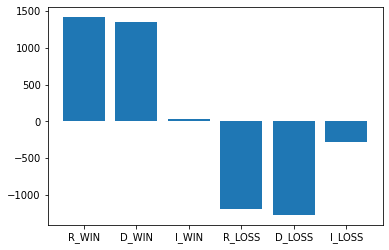

In [31]:
data = win_dict
names = list(data.keys())
values = list(data.values())
fig, ax = plt.subplots()

plt.bar(range(len(data)), values, tick_label=names)
plt.show()